- in our original agenda this week we try different covariance estimation method
- but I think we'd better go directly to regression model
- then we can save some time for further more complicate machine learning models


- this week we focus on the most simple linear regression without regularization

In [1]:
from helper import *
from stats import *
from product_info import *
from imp import reload  
import helper
import stats
reload(helper)
reload(stats)
get_daily_pred


<function helper.get_daily_pred(file_name, product, signal_list, coef, strat, HEAD_PATH)>

In [2]:
CORE_NUM = int(os.environ['NUMBER_OF_PROCESSORS'])
CORE_NUM

16

In [3]:
import warnings
 
warnings.filterwarnings('ignore')

In [4]:
period = 4096
product_list = ["bu", "ru", "v", "pp", "l", "jd"]

In [5]:
import os
all_dates = os.listdir(DATA_PATH + product_list[0])
all_dates.sort()
all_dates = np.array(all_dates)
n_days = len(all_dates)
n_days
## 1066

1066

In [6]:
import dask
from dask import compute, delayed
import sklearn.preprocessing

In [7]:
os.makedirs(HEAD_PATH+"/all signal", exist_ok=True)
dire_signal_list = ["trade.imb", "total.trade.imb", "nr", "dbook", "range.pos", "price.osci", "ma.dif.10", "kdj.k", "kdj.j"]
range_signal_list = ["", "range", "std", "volume.open.ratio", "trend.index"]
all_signal_list = np.array([])
for range_signal in range_signal_list:
    for dire_signal in dire_signal_list:
        if len(range_signal)==0:
            signal_name = dire_signal
        else:
            signal_name = dire_signal+"."+range_signal
        all_signal_list = np.append(all_signal_list,signal_name)
signal_list = [signal+".4096" for signal in all_signal_list]
np.append(signal_list, ["ret.4096", "ret.4096.001", "ret.4096.002"])
n_signal = len(signal_list)

In [9]:
split_date = "201910"
train_sample = all_dates<split_date
test_sample = all_dates>split_date
date_str = [n[0:8] for n in all_dates]
format_dates = np.array([pd.to_datetime(d) for d in date_str])

- let's begin with week 8

In [10]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import lasso_path, LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler
#y_signal = "ret."+str(period)+".002"





In [11]:
product = product_list[0]
train_mat = load(HEAD_PATH+"/train test mat/"+product+".train.mat.pkl")


In [12]:
coef_list=dict([])
y_signal = "ret.4096.004"
for product in product_list:
    train_mat = load(HEAD_PATH+"/train test mat/"+product+".train.mat.pkl")
    x_train = train_mat.iloc[:, :n_signal].values
    y_train = train_mat.loc[:, y_signal].values
    scaler =  StandardScaler(copy=True, with_mean=True, with_std=True)
    scaler.fit(x_train)
    x_std = np.sqrt(scaler.var_)
    x_train_normal = scaler.transform(x_train)
    y_std = np.std(y_train)
    model = LassoCV(n_alphas=100, fit_intercept=False, cv=10, max_iter=10000).fit(x_train_normal, y_train/y_std)
    coef = model.coef_/x_std*y_std
    print(product)
    print(coef)
    coef_list[product] = coef
    
# bu
# [-0.          0.         -0.         -0.          0.          0.00028797
#   0.         -0.         -0.         -0.         -0.         -0.
#  -0.         -0.          0.         -0.         -0.         -0.
#   0.         -0.         -0.00014889  0.         -0.         -0.
#  -0.         -0.         -0.         -0.         -0.         -0.
#  -0.         -0.          0.          0.         -0.         -0.
#  -0.00324814 -0.         -0.         -0.0003865   0.          0.
#   0.          0.          0.        ]
# ru
# [-0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
#  -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
#  -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
#  -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
#  -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
#   0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
#  -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
#  -0.00000000e+00  0.00000000e+00 -0.00000000e+00 -2.21532901e-18
#  -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
#  -0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
#  -0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
#  -0.00000000e+00]
# v
# [-0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
#   0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
#   0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -5.18103251e-05
#  -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
#  -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
#  -0.00000000e+00 -1.24388318e-04 -0.00000000e+00 -0.00000000e+00
#  -0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
#  -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
#  -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
#   0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
#  -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
#   0.00000000e+00]
# pp
# [-0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
#  -3.53357989e-04  3.91731066e-04  0.00000000e+00 -4.80600938e-04
#  -0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
#  -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
#   0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
#   9.59716969e-05 -9.18821255e-04  0.00000000e+00  0.00000000e+00
#   0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
#   0.00000000e+00  0.00000000e+00 -1.89903890e-02 -8.16794118e-03
#   0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
#   3.02626684e-04  7.34898404e-03  0.00000000e+00  9.49930234e-03
#  -0.00000000e+00  0.00000000e+00  1.02526103e-02 -0.00000000e+00
#  -0.00000000e+00]
# l
# [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
#  -0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
#   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
#  -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
#   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
#   0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
#   0.00000000e+00  0.00000000e+00  0.00000000e+00  2.00329395e-18
#   0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
#   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
#  -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
#  -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
#   0.00000000e+00]
# jd
# [-0.00736473 -0.          0.         -0.          0.          0.
#   0.         -0.          0.         -0.         -0.          0.
#  -0.         -0.          0.          0.          0.          0.
#   0.         -0.          0.          0.         -0.          0.
#   0.          0.          0.         -0.          0.          0.
#  -0.          0.          0.          0.          0.          0.
#  -0.          0.          0.         -0.          0.          0.
#   0.          0.          0.        ]

bu
[-0.          0.         -0.         -0.          0.          0.00028797
  0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.          0.         -0.         -0.         -0.
  0.         -0.         -0.00014889  0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.          0.          0.         -0.         -0.
 -0.00324814 -0.         -0.         -0.0003865   0.          0.
  0.          0.          0.        ]
ru
[-0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00

- it seems the result is ok

In [13]:
SAVE_PATH = "e:/intern"
split_str = split_date

In [14]:
save(coef_list, SAVE_PATH+"/energy.coef.ret.4096.004.pkl")

- we can see that the result is not good

- it's still not good. So we cannot use lasso model

In [15]:
def par_get_signal_mat(file_name, product, signal_list, HEAD_PATH, SAVE_PATH):
    data = load(HEAD_PATH+"/pkl tick/"+product+"/"+file_name)
    signal_mat = functools.reduce(functools.partial(get_signal_mat, product=product, file_name=file_name, HEAD_PATH=SAVE_PATH), signal_list, None)
    save(signal_mat, SAVE_PATH+"/signal mat pkl/"+product+"/"+file_name)

In [16]:
def par_get_daily_pred(file_name, product, coef, strat, HEAD_PATH):
    signal_mat = load(HEAD_PATH+"/signal mat pkl/"+product+"/"+file_name)
    S = np.dot(signal_mat.transpose(),coef)
    save(S, HEAD_PATH+"/tmp pkl/"+product+"/"+strat+"/"+file_name)      



- now let's try lasso regression

In [17]:
strat = "lasso.004."+str(period)
for product in product_list:
    os.makedirs("e:/intern"+"/tmp pkl/"+product+"/"+strat, exist_ok=True)

In [18]:
coef_list = load(SAVE_PATH+"/energy.coef.ret.4096.004.pkl")

In [19]:
for product in product_list:
    os.makedirs("e:/intern"+"/tmp pkl/"+product+"/"+strat, exist_ok=True)

In [20]:
os.makedirs("e:/intern"+"/signal mat pkl", exist_ok=True)
for product in product_list:
    os.makedirs("e:/intern"+"/signal mat pkl/"+product, exist_ok=True)

In [21]:
%%time
for product in product_list:
    print(product)
    parLapply(CORE_NUM, all_dates, par_get_signal_mat, product=product, signal_list=signal_list, HEAD_PATH=HEAD_PATH, SAVE_PATH=SAVE_PATH)
    
# cu
# zn
# ni
# ag
# au
# Wall time: 1h 11min 29s



bu
ru
v
pp
l
jd
Wall time: 1h 11min 29s


In [22]:
%%time
for product in product_list:
    print(product)
    coef = coef_list[product]
    parLapply(CORE_NUM, all_dates, par_get_daily_pred, 
              product=product, coef=coef, strat=strat, HEAD_PATH="e:/intern")

# bu
# ru
# v
# pp
# l
# jd
# Wall time: 1h 27min 21s




bu
ru
v
pp
l
jd
Wall time: 1h 27min 21s


In [23]:
%%time
for product in product_list:
    par_get_all_signal(strat, all_dates, product, 4096, SAVE_PATH="e:/intern")

## Wall time: 5min 12s


Wall time: 5min 12s


In [24]:
%%time
for product in product_list:
    spread = product_info[product]["spread"]
    tranct = product_info[product]["tranct"]
    tranct_ratio = product_info[product]["tranct.ratio"]
    evaluate_signal("lasso.004", all_dates, product, 2, 20, 
                    CORE_NUM, HEAD_PATH, SAVE_PATH, period=4096, split_str=split_str, tranct=tranct, 
                    max_spread=spread*1.1, tranct_ratio=tranct_ratio, atr_filter=0.01, save_path="signal result atr",reverse=1)

# reverse=1
# reverse=1
# reverse=1
# reverse=1
# reverse=1
# reverse=1
# Wall time: 14min 30s




reverse=1
reverse=1
reverse=1
reverse=1
reverse=1
reverse=1
Wall time: 14min 30s


bu train sharpe  1.3561246767439958 test sharpe  0.7894527145331018
ru train sharpe  0.7172191381865639 test sharpe  -0.8829842668333061
v train sharpe  1.238527955884543 test sharpe  -0.8599232011653384
pp train sharpe  0.7314018503920457 test sharpe  0.5370413938397671
l train sharpe  0.903923149506969 test sharpe  0.20265775060292235
train sharpe:  1.9717532710138894 test sharpe:  -0.3752731881066425


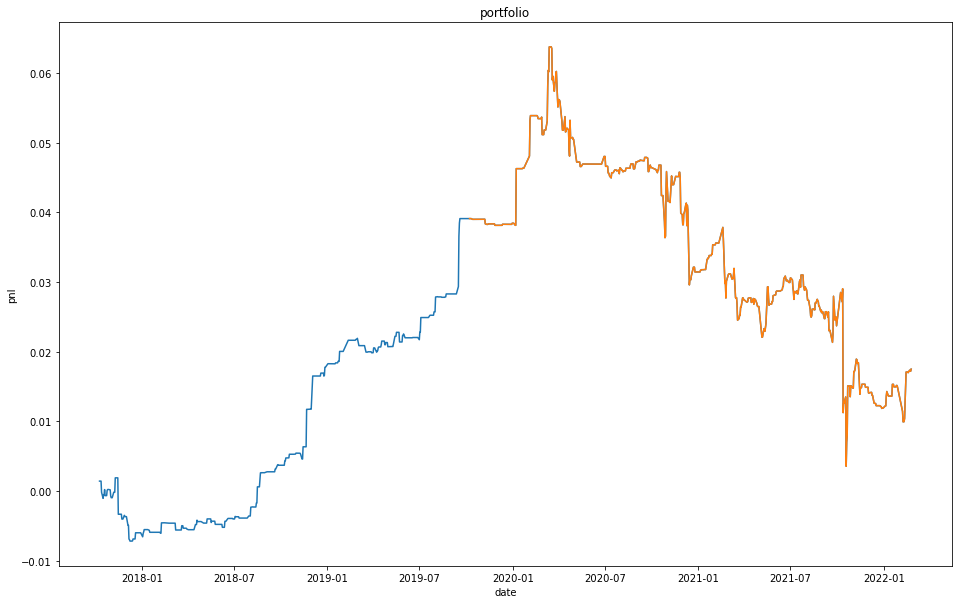

In [26]:
i = 0
strat = "lasso.004.4096"
test_all_pnl = np.zeros([sum(test_sample), 5])
train_all_pnl = np.zeros([sum(train_sample), 5])
min_pnl = 2
min_num = 0
for product in product_list:
    spread = product_info[product]["spread"]
    signal_stat = load(HEAD_PATH+"/signal result atr/"+product+"."+strat+".trend.pkl")
    train_stat = signal_stat["train.stat"]
    good_strat = (train_stat["final.result"]["avg.pnl"]>min_pnl*spread) & (train_stat["final.result"]["num"]>min_num)
    if sum(good_strat)==0:
        continue
    train_pnl = train_stat["daily.ret"].loc[:, good_strat].sum(axis=1)/sum(good_strat)
    test_stat = signal_stat["test.stat"]
    test_pnl = test_stat["daily.ret"].loc[:, good_strat].sum(axis=1)/sum(good_strat)
    print(product, "train sharpe ", sharpe(train_pnl), "test sharpe ", sharpe(test_pnl))
    test_all_pnl[:,i] = test_pnl
    train_all_pnl[:,i] = train_pnl
    i = i+1
train_portfolio = np.array(np.mean(train_all_pnl, axis=1))
test_portfolio = np.array(np.mean(test_all_pnl, axis=1))
all_portfolio = np.append(train_portfolio, test_portfolio)
plt.figure(1, figsize=(16, 10));
plt.title("");
plt.xlabel("date");
plt.ylabel("pnl");
plt.title("portfolio");
plt.plot(format_dates, all_portfolio.cumsum());
plt.plot(format_dates[test_sample], all_portfolio.cumsum()[test_sample])
print("train sharpe: ", sharpe(train_portfolio), "test sharpe: ", sharpe(test_portfolio))    

# bu train sharpe  1.3561246767439958 test sharpe  0.7894527145331018
# ru train sharpe  0.7172191381865639 test sharpe  -0.8829842668333061
# v train sharpe  1.238527955884543 test sharpe  -0.8599232011653384
# pp train sharpe  0.7314018503920457 test sharpe  0.5370413938397671
# l train sharpe  0.903923149506969 test sharpe  0.20265775060292235
# train sharpe:  1.9717532710138894 test sharpe:  -0.3752731881066425







- The result is not good
- Now we go to ridge

In [27]:
coef_list=dict([])
y_signal= "ret." + str(period)+".004"
for product in product_list:
    train_mat = load(HEAD_PATH+"/train test mat/"+product+".train.mat.pkl")
    x_train = train_mat.iloc[:, :n_signal].values
    y_train = train_mat.loc[:, y_signal].values
    scaler =  StandardScaler(copy=True, with_mean=True, with_std=True)
    scaler.fit(x_train)
    x_std = np.sqrt(scaler.var_)
    y_std = np.std(y_train)
    x_train_normal = scaler.transform(x_train)
    model = RidgeCV(fit_intercept=False, cv=5).fit(x_train_normal, y_train/y_std)
    coef = model.coef_/x_std*y_std
    print(product)
    print(coef)
    coef_list[product] = coef

# bu
# [ 3.97735210e-05 -4.18616247e-06  9.78975136e-03  1.46169395e-03
#   2.00358223e-03  7.38343528e-04 -8.27711535e-02  3.72608472e-04
#  -1.61327757e-03 -4.69076228e-04 -6.05927173e-05  1.47759827e-04
#  -5.61227589e-04 -6.10984955e-05  2.55705144e-05 -4.77223010e-03
#  -5.34921455e-07  2.28459355e-05  2.51828911e-03  3.00425304e-04
#  -1.33775259e-03  2.13461033e-03  3.37577933e-04  1.09892584e-04
#   9.49945491e-03 -3.35310171e-05 -1.25052217e-04 -3.08767397e-03
#   6.04656669e-04  4.45004543e-02  1.51723236e-03 -4.08605492e-02
#  -6.16867098e-03  4.71422904e-01 -3.55921951e-03  1.08754861e-02
#  -1.02725647e-02  3.70533594e-03 -4.71911820e-02 -8.81033844e-04
#   8.32678083e-03  2.25812350e-04  1.21746877e-01  8.06200954e-04
#  -9.32237209e-05]
# ru
# [ 1.51754363e-02  3.08876778e-04  7.69291744e-03 -3.21199605e-03
#   1.25197129e-03  5.78003141e-04 -8.54835821e-02 -4.56426105e-04
#  -1.45066037e-04 -1.35461375e-04  7.21967961e-05  1.01722409e-04
#   9.09456494e-05  1.40161038e-05  1.70676833e-05 -2.99595883e-03
#  -1.76289011e-06  1.97024285e-06  2.45766685e-04 -2.47406557e-04
#   5.00125682e-04 -4.33241258e-04 -8.96054318e-05 -1.45904940e-06
#  -7.65668333e-04 -4.84572277e-05  5.21284340e-05  6.45736564e-02
#  -7.04717184e-02 -7.34787460e-03 -7.38688137e-02 -4.58057200e-02
#  -1.45722193e-02  2.27070516e+00  1.16319643e-02 -5.10701356e-03
#  -3.76319478e-02  5.56382272e-03 -1.84221180e-02  2.18241143e-02
#   4.01524279e-03  2.93404072e-04  1.41526960e-01 -7.22221968e-04
#   2.99450174e-04]
# v
# [ 4.47632027e-03 -5.77185814e-03 -8.20662823e-03 -8.53628463e-03
#   8.03536697e-03  4.14825232e-05  3.05181238e-01 -2.35647827e-05
#  -1.90309430e-03  4.31471731e-04 -3.68575550e-05 -3.15070770e-04
#   1.28534854e-04  4.12705399e-05 -3.21382872e-05 -7.93529898e-04
#  -8.47523420e-06  4.25610052e-06 -1.57794238e-03  4.07129939e-04
#   2.58116187e-04 -8.62037800e-04 -3.63281868e-04  2.04201750e-04
#   5.54976484e-03 -1.86549663e-05 -1.23824042e-04 -4.71757243e-02
#  -2.76074439e-04  1.78008169e-02  4.08841702e-02  1.70984739e-02
#  -6.66030421e-03 -3.15997415e-01  6.65805731e-03  3.60594382e-05
#   5.29523117e-03  6.81645807e-03 -6.03472693e-03  8.73075099e-04
#  -1.18708228e-02  6.59061015e-04 -1.62234049e-01  9.60009278e-04
#   2.32080255e-03]
# pp
# [-3.34727733e-04 -5.07937456e-03 -2.32499159e-02  1.70064971e-03
#  -8.48428783e-03  2.53571215e-03  2.78547384e-01 -1.15032414e-03
#   1.57677358e-03  5.69650132e-04 -1.02896859e-04  8.25550061e-05
#  -1.42471605e-06  1.76508935e-05  8.37519834e-06 -2.55033006e-04
#  -6.11487050e-06 -4.70342526e-06 -5.45007665e-04 -3.42413404e-04
#  -6.30687135e-04 -1.45858028e-03  3.14493341e-04 -1.00626890e-04
#   2.13629692e-03  9.00557554e-05 -4.66646728e-05 -1.45396419e-01
#   6.60244272e-02  1.52829858e-01 -1.83042160e-02 -2.66384189e-02
#  -3.23578096e-03 -1.00662804e+00 -3.13094372e-03  2.08682234e-03
#   4.86516134e-03  1.40904751e-02 -4.15660357e-03  1.87530574e-02
#   5.19901495e-03 -2.81984122e-03  3.14575024e-01  1.98183051e-05
#  -7.13742943e-04]
# l
# [ 1.28862064e-02 -1.26456734e-02  4.56128728e-02 -1.13813957e-02
#   4.80779502e-03 -4.37920779e-04  6.85758832e-02  9.80396977e-04
#  -2.36304858e-03  9.37529588e-05  2.19944464e-04 -5.66228585e-04
#  -4.54516371e-05 -1.92683240e-04 -4.22664583e-06  6.16178955e-06
#   1.98824164e-06  6.97540733e-06 -1.99889175e-04  2.72025686e-05
#  -5.31454201e-04 -1.59027971e-04 -4.04752097e-04  9.74158483e-05
#  -3.95980794e-03  4.04904760e-05  5.85452887e-05  1.46770310e-02
#   2.40992737e-02  2.69390532e-02  1.66829361e-02  1.17554577e-02
#  -5.57743329e-03  1.02226872e+00 -6.64217867e-03  1.09396822e-02
#  -2.10949513e-02 -9.23895025e-03  1.61090390e-02  1.43583770e-02
#   8.57931735e-03 -1.81911583e-03 -1.75891075e-01 -1.12982598e-03
#   1.01548377e-03]
# jd
# [-4.25608554e-02 -1.87355493e-03  1.02027634e-02  1.13542899e-02
#  -5.96250608e-03  7.49431668e-04 -1.49696118e-01 -2.36759526e-03
#   4.18236874e-03  1.71943924e-04  7.77454053e-05 -4.34494245e-04
#  -4.89179427e-04  9.08842449e-06  2.05803908e-05  2.81088213e-03
#  -2.50174665e-05 -4.23348128e-05 -9.33127995e-05 -4.26886120e-04
#   2.83386631e-03  1.87051433e-03 -2.28673154e-04 -2.34183890e-04
#  -1.02586965e-02  3.15039412e-04 -5.88543736e-05  5.56430105e-02
#  -1.01669064e-02  5.03580590e-02 -1.91164509e-02  5.14453484e-03
#   2.57134583e-04  3.75510551e-01 -3.15083627e-04 -6.05186113e-04
#   2.08803363e-02  6.73917054e-03 -3.86344512e-02 -6.41841061e-03
#   1.39286546e-03  1.05462834e-03 -3.29422279e-02  1.43643679e-03
#  -1.32005785e-03]

bu
[ 3.97735210e-05 -4.18616247e-06  9.78975136e-03  1.46169395e-03
  2.00358223e-03  7.38343528e-04 -8.27711535e-02  3.72608472e-04
 -1.61327757e-03 -4.69076228e-04 -6.05927173e-05  1.47759827e-04
 -5.61227589e-04 -6.10984955e-05  2.55705144e-05 -4.77223010e-03
 -5.34921455e-07  2.28459355e-05  2.51828911e-03  3.00425304e-04
 -1.33775259e-03  2.13461033e-03  3.37577933e-04  1.09892584e-04
  9.49945491e-03 -3.35310171e-05 -1.25052217e-04 -3.08767397e-03
  6.04656669e-04  4.45004543e-02  1.51723236e-03 -4.08605492e-02
 -6.16867098e-03  4.71422904e-01 -3.55921951e-03  1.08754861e-02
 -1.02725647e-02  3.70533594e-03 -4.71911820e-02 -8.81033844e-04
  8.32678083e-03  2.25812350e-04  1.21746877e-01  8.06200954e-04
 -9.32237209e-05]
ru
[ 1.51754363e-02  3.08876778e-04  7.69291744e-03 -3.21199605e-03
  1.25197129e-03  5.78003141e-04 -8.54835821e-02 -4.56426105e-04
 -1.45066037e-04 -1.35461375e-04  7.21967961e-05  1.01722409e-04
  9.09456494e-05  1.40161038e-05  1.70676833e-05 -2.99595883e-03
 

In [28]:
save(coef_list, SAVE_PATH+"/energy.coef.ridge.004.pkl")

In [29]:
strat = "ridge.004."+str(period)
for product in product_list:
    os.makedirs("e:/intern"+"/tmp pkl/"+product+"/"+strat, exist_ok=True)

In [30]:
%%time
for product in product_list:
    print(product)
    coef = coef_list[product]
    parLapply(CORE_NUM, all_dates, par_get_daily_pred, 
              product=product, coef=coef, strat=strat, HEAD_PATH="e:/intern")

# bu
# ru
# v
# pp
# l
# jd
# Wall time: 1h 32min 19s



bu
ru
v
pp
l
jd
Wall time: 1h 32min 19s


In [31]:
%%time
for product in product_list:
    par_get_all_signal(strat, all_dates, product, 4096, SAVE_PATH="e:/intern")
    
# Wall time: 4min 42s

Wall time: 4min 42s


In [32]:
%%time
SAVE_PATH = "e:/intern"
for product in product_list:
    spread = product_info[product]["spread"]
    tranct = product_info[product]["tranct"]
    tranct_ratio = product_info[product]["tranct.ratio"]
    evaluate_signal("ridge.004", all_dates, product, 2, 20, 
                    CORE_NUM, HEAD_PATH, SAVE_PATH, period=4096, split_str=split_str, tranct=tranct, 
                    max_spread=spread*1.1, tranct_ratio=tranct_ratio, atr_filter=0.01, save_path="signal result atr",reverse=1)

# reverse=1
# reverse=1
# reverse=1
# reverse=1
# reverse=1
# reverse=1
# Wall time: 15min 34s



reverse=1
reverse=1
reverse=1
reverse=1
reverse=1
reverse=1
Wall time: 15min 34s


bu train sharpe  1.5284463579372265 test sharpe  0.48869515281000164
ru train sharpe  0.7454290812594269 test sharpe  1.2605098935646597
v train sharpe  1.3843088947086697 test sharpe  -0.5476655180500608
pp train sharpe  0.7079068058097567 test sharpe  -0.6058777149450485
l train sharpe  1.6521569751277956 test sharpe  1.2149401176910664
train sharpe:  2.5758076390058515 test sharpe:  0.6023575464626939


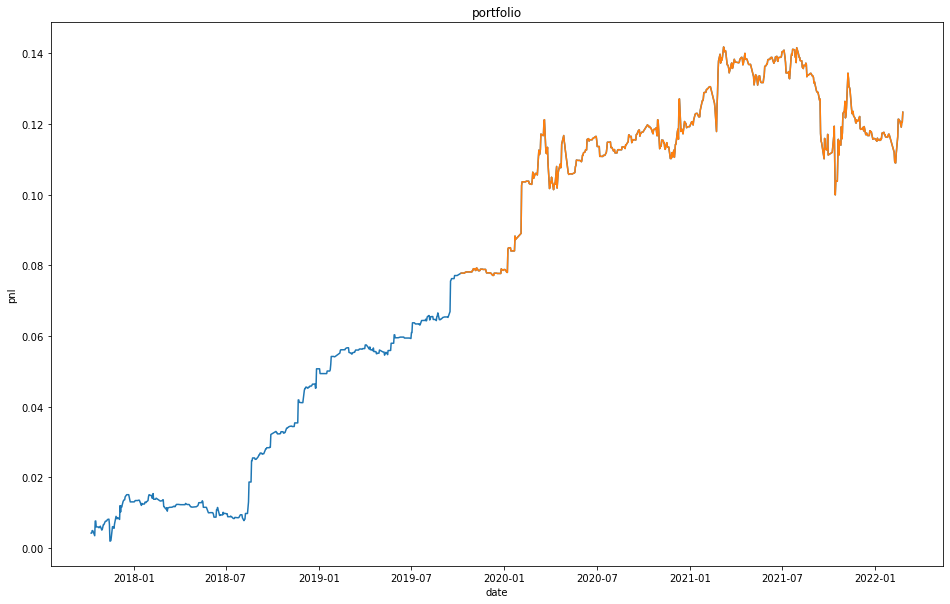

In [47]:
i = 0
strat = "ridge.004.4096"
test_all_pnl = np.zeros([sum(test_sample), len(product_list)])
train_all_pnl = np.zeros([sum(train_sample), len(product_list)])
min_pnl = 2
min_num = 10
for product in product_list:
    spread = product_info[product]["spread"]
    signal_stat = load(HEAD_PATH+"/signal result atr/"+product+"."+strat+".trend.pkl")
    train_stat = signal_stat["train.stat"]
    good_strat = (train_stat["final.result"]["avg.pnl"]>min_pnl*spread) & (train_stat["final.result"]["num"]>min_num)
    if sum(good_strat)<1:
        continue
    train_pnl = train_stat["daily.ret"].loc[:, good_strat].sum(axis=1)/sum(good_strat)
    test_stat = signal_stat["test.stat"]
    test_pnl = test_stat["daily.ret"].loc[:, good_strat].sum(axis=1)/sum(good_strat)
    print(product, "train sharpe ", sharpe(train_pnl), "test sharpe ", sharpe(test_pnl))
    test_all_pnl[:,i] = test_pnl
    train_all_pnl[:,i] = train_pnl
    i = i+1
train_portfolio = np.array(np.mean(train_all_pnl, axis=1))
test_portfolio = np.array(np.mean(test_all_pnl, axis=1))
all_portfolio = np.append(train_portfolio, test_portfolio)
plt.figure(1, figsize=(16, 10));
plt.title("");
plt.xlabel("date");
plt.ylabel("pnl");
plt.title("portfolio");
plt.plot(format_dates, all_portfolio.cumsum());
plt.plot(format_dates[test_sample], all_portfolio.cumsum()[test_sample])
print("train sharpe: ", sharpe(train_portfolio), "test sharpe: ", sharpe(test_portfolio))    

# bu train sharpe  1.5284463579372265 test sharpe  0.48869515281000164
# ru train sharpe  0.7454290812594269 test sharpe  1.2605098935646597
# v train sharpe  1.3843088947086697 test sharpe  -0.5476655180500608
# pp train sharpe  0.7079068058097567 test sharpe  -0.6058777149450485
# l train sharpe  1.6521569751277956 test sharpe  1.2149401176910664
# train sharpe:  2.5758076390058515 test sharpe:  0.6023575464626939







In [34]:
from sklearn.linear_model import ElasticNetCV

In [35]:
strat = "elastic.004."+str(period)

In [36]:
for product in product_list:
    os.makedirs(SAVE_PATH+"/tmp pkl/"+product+"/"+strat, exist_ok=True)

In [37]:
train_mat = load(HEAD_PATH+"/train test mat/"+product+".train.mat.pkl")
x_train = train_mat.iloc[:, :n_signal].values
y_train = train_mat.loc[:, y_signal].values


In [38]:
coef_list=dict([])
y_signal= "ret." + str(period)+".004"
for product in product_list:
    train_mat = load(HEAD_PATH+"/train test mat/"+product+".train.mat.pkl")
    x_train = train_mat.iloc[:, :n_signal].values
    y_train = train_mat.loc[:, y_signal].values
    scaler =  StandardScaler(copy=True, with_mean=True, with_std=True)
    scaler.fit(x_train)
    x_std = np.sqrt(scaler.var_)
    y_std = np.std(y_train)
    x_train_normal = scaler.transform(x_train)
    model = ElasticNetCV(n_alphas=100, l1_ratio=0.5, fit_intercept=False, cv=10, max_iter=10000).fit(x_train_normal, y_train/y_std)
    coef = model.coef_/x_std*y_std
    print(product)
    print(coef)
    coef_list[product] = coef

# bu
# [-0.          0.         -0.         -0.          0.          0.00028093
#   0.         -0.         -0.         -0.         -0.         -0.
#  -0.         -0.          0.         -0.         -0.         -0.
#   0.         -0.         -0.00014268  0.         -0.         -0.
#  -0.         -0.         -0.         -0.         -0.         -0.
#  -0.         -0.          0.          0.         -0.         -0.
#  -0.00312223 -0.         -0.         -0.000466    0.          0.
#   0.          0.          0.        ]
# ru
# [-0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
#  -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
#  -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
#  -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
#  -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
#   0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
#  -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
#  -0.00000000e+00  0.00000000e+00 -0.00000000e+00 -5.03244122e-18
#  -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
#  -0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
#  -0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
#  -0.00000000e+00]
# v
# [-0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
#   0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
#   0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.95871257e-05
#  -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -1.05513632e-05
#  -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
#  -0.00000000e+00 -1.23751477e-04 -0.00000000e+00 -0.00000000e+00
#  -0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
#  -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
#  -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
#  -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
#  -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
#   0.00000000e+00]
# pp
# [-0.         -0.          0.         -0.         -0.00045084  0.00041099
#   0.         -0.00048305 -0.          0.          0.          0.
#  -0.         -0.          0.          0.          0.          0.
#   0.          0.          0.00010022 -0.00090364  0.          0.
#   0.          0.          0.         -0.0019194   0.          0.
#  -0.02043752 -0.00813387  0.         -0.         -0.         -0.
#   0.00099038  0.00730087  0.          0.00960805 -0.          0.
#   0.01218664 -0.         -0.        ]
# l
# [ 0.  0.  0. -0. -0.  0.  0.  0.  0.  0.  0.  0. -0. -0.  0.  0.  0.  0.
#   0.  0.  0. -0. -0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.  0.  0.
#  -0. -0.  0. -0. -0. -0. -0.  0.  0.]
# jd
# [-0.00717509 -0.          0.         -0.          0.          0.
#   0.         -0.          0.         -0.         -0.          0.
#  -0.         -0.          0.          0.          0.          0.
#   0.         -0.          0.          0.         -0.          0.
#   0.          0.          0.         -0.          0.          0.
#  -0.          0.          0.          0.          0.          0.
#  -0.          0.          0.         -0.          0.          0.
#   0.          0.          0.        ]

bu
[-0.          0.         -0.         -0.          0.          0.00028093
  0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.          0.         -0.         -0.         -0.
  0.         -0.         -0.00014268  0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.          0.          0.         -0.         -0.
 -0.00312223 -0.         -0.         -0.000466    0.          0.
  0.          0.          0.        ]
ru
[-0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00

In [48]:
save(coef_list, SAVE_PATH+"/energy.coef.elastic.004.pkl")

In [49]:
strat = "elastic.004."+str(period)
for product in product_list:
    os.makedirs("e:/intern"+"/tmp pkl/"+product+"/"+strat, exist_ok=True)

In [41]:
%%time
for product in product_list:
    print(product)
    coef = coef_list[product]
    parLapply(CORE_NUM, all_dates, par_get_daily_pred, 
              product=product, coef=coef, strat=strat, HEAD_PATH="e:/intern")
    
# bu
# ru
# v
# pp
# l
# jd
# Wall time: 1h 26min 57s


bu
ru
v
pp
l
jd
Wall time: 1h 26min 57s


In [42]:
%%time
for product in product_list:
    par_get_all_signal(strat, all_dates, product, 4096, SAVE_PATH="e:/intern")
    
# Wall time: 5min 30s

Wall time: 5min 30s


In [43]:
%%time
SAVE_PATH = "e:/intern"
for product in product_list:
    spread = product_info[product]["spread"]
    tranct = product_info[product]["tranct"]
    tranct_ratio = product_info[product]["tranct.ratio"]
    evaluate_signal("elastic.004", all_dates, product, 2, 20, 
                    CORE_NUM, HEAD_PATH, SAVE_PATH, period=4096, split_str=split_str, tranct=tranct, 
                    max_spread=spread*1.1, tranct_ratio=tranct_ratio, atr_filter=0.01, save_path="signal result atr",reverse=1)
    
# reverse=1
# reverse=1
# reverse=1
# reverse=1
# reverse=1
# reverse=1
# Wall time: 9min 53s




reverse=1
reverse=1
reverse=1
reverse=1
reverse=1
reverse=1
Wall time: 9min 53s


bu train sharpe  1.2838466615091977 test sharpe  0.7046660841094488
ru train sharpe  0.7172191381865639 test sharpe  -0.8829842668333061
v train sharpe  1.3027317706594796 test sharpe  -0.7916480320284239
pp train sharpe  0.7664271578337857 test sharpe  0.524120734878861
train sharpe:  1.8855353878206873 test sharpe:  -0.37399263291179863


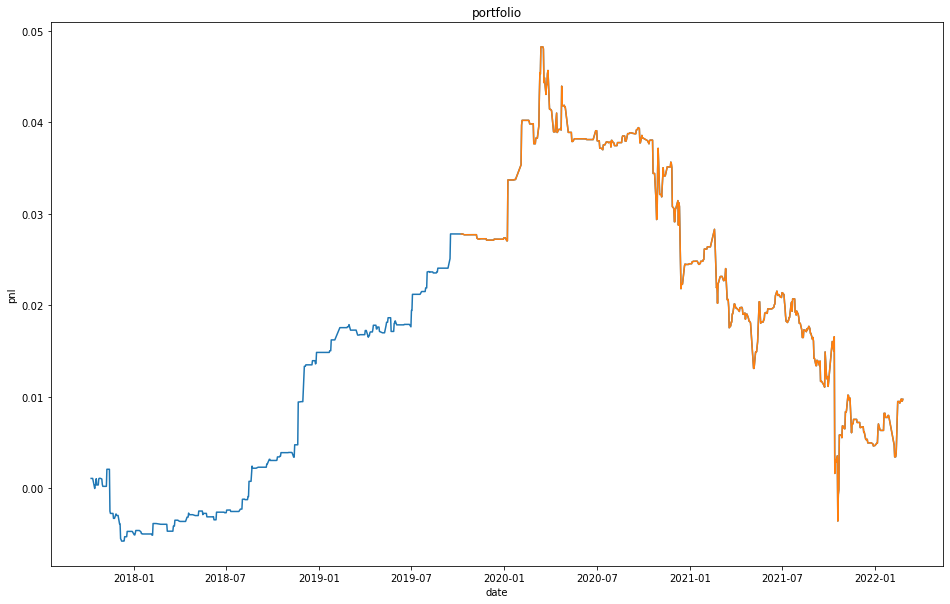

In [44]:
i = 0
strat = "elastic.004.4096"
test_all_pnl = np.zeros([sum(test_sample), len(product_list)])
train_all_pnl = np.zeros([sum(train_sample), len(product_list)])
min_pnl = 2
min_num = 0
for product in product_list[:4]:
    spread = product_info[product]["spread"]
    signal_stat = load(HEAD_PATH+"/signal result atr/"+product+"."+strat+".trend.pkl")
    train_stat = signal_stat["train.stat"]
    good_strat = (train_stat["final.result"]["avg.pnl"]>min_pnl*spread) & (train_stat["final.result"]["num"]>min_num)
    if sum(good_strat)==0:
        continue
    train_pnl = train_stat["daily.ret"].loc[:, good_strat].sum(axis=1)/sum(good_strat)
    test_stat = signal_stat["test.stat"]
    test_pnl = test_stat["daily.ret"].loc[:, good_strat].sum(axis=1)/sum(good_strat)
    print(product, "train sharpe ", sharpe(train_pnl), "test sharpe ", sharpe(test_pnl))
    test_all_pnl[:,i] = test_pnl
    train_all_pnl[:,i] = train_pnl
    i = i+1
train_portfolio = np.array(np.mean(train_all_pnl, axis=1))
test_portfolio = np.array(np.mean(test_all_pnl, axis=1))
all_portfolio = np.append(train_portfolio, test_portfolio)
plt.figure(1, figsize=(16, 10));
plt.title("");
plt.xlabel("date");
plt.ylabel("pnl");
plt.title("portfolio");
plt.plot(format_dates, all_portfolio.cumsum());
plt.plot(format_dates[test_sample], all_portfolio.cumsum()[test_sample])
print("train sharpe: ", sharpe(train_portfolio), "test sharpe: ", sharpe(test_portfolio))   

# bu train sharpe  1.2838466615091977 test sharpe  0.7046660841094488
# ru train sharpe  0.7172191381865639 test sharpe  -0.8829842668333061
# v train sharpe  1.3027317706594796 test sharpe  -0.7916480320284239
# pp train sharpe  0.7664271578337857 test sharpe  0.524120734878861
# train sharpe:  1.8855353878206873 test sharpe:  -0.37399263291179863



- output to txt file

In [45]:
os.makedirs("d:/intern/input", exist_ok=True)
np.set_printoptions(suppress=True)

In [46]:
for product in product_list:
    file_name = "d:/intern/input/"+product+".signal.txt"
    fo = open(file_name, "w")
    fo.writelines("signal coef\n")
    chosen_signal = coef_list[product]!=0
    for i in np.where(chosen_signal)[0]:
        fo.writelines(signal_list[i]+" "+str(coef_list[product][i])+"\n")
    fo.close()